# Step size performance

The code provided in this notebook will plot statistics on the performance of MSE minimalization runs with different step sizes.

In [12]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Step 1:  Collect run samples into a directory, then set the path to said directory. Label the samples with the step size used for each one, as shown in this example. Make sure to also set the tolerance for what you consider to be a successful run.

In [13]:
path = "nguyen2/"
tolerance = 1e-15

In [14]:
def success_rate(errors: list):
  return sum(error <= tolerance for error in errors) / len(errors)

Step 2: Execute the following cell to gather the performance data for the collection of runs.

In [15]:
results = {}

for folder in os.listdir(path):
  folder_path = os.path.join(path, folder)
  if not os.path.isdir(folder_path):  # Skip if it's not a directory
    continue

  errors = []
  iterations = []
  step_size = float(folder)
  results[step_size] = {}

  for filename in os.listdir(os.path.join(path, folder)):
    if filename.startswith("mse_run"):
      with open(os.path.join(path, folder, filename), 'r') as file:
        lines = file.readlines()
        last = lines[-2] if lines[-1].startswith(("target", "best")) else lines[-1]
        req_steps, final_error=int(last.split(" || ")[1]), float(last.split(" || ")[2])

        errors.append(final_error)
        if final_error <= tolerance:
          iterations.append(req_steps)

  results[step_size]["success_rate"] = success_rate(errors)
  results[step_size]["iterations"] = iterations


Step 3: Run the next cell to visualize the data using seaborn.

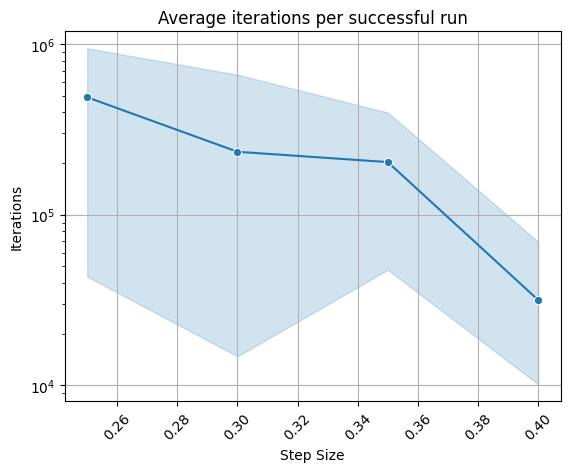

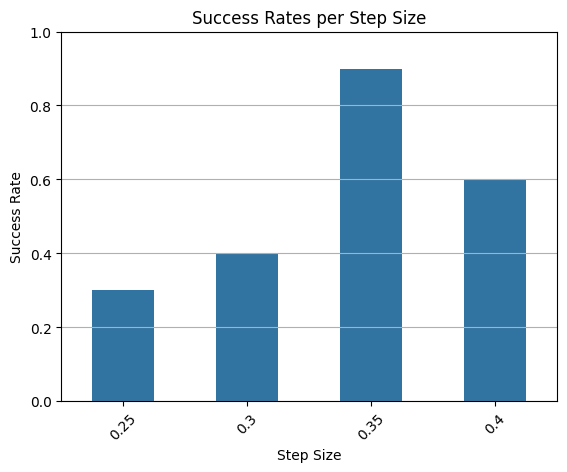

In [16]:
iteration_data = []
for step_size in results:
    for iteration in results[step_size]["iterations"]:
        iteration_data.append({'step_size': step_size, 'iterations': iteration})

df = pd.DataFrame(iteration_data)

sns.lineplot(data=df, x='step_size', y='iterations', marker='o')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Average iterations per successful run')
plt.ylabel('Iterations')
plt.xlabel('Step Size')
plt.grid()
plt.show()

# Prepare data for success rates
success_data = []
for step_size in results:
    success_rate = results[step_size]["success_rate"]
    success_data.append({'step_size': step_size, 'success_rate': success_rate})

# Create a DataFrame for success rates
success_df = pd.DataFrame(success_data)

# Plot the success rates as a bar graph
sns.barplot(data=success_df, x='step_size', y='success_rate', width=0.5)
plt.xticks(rotation=45)
plt.title('Success Rates per Step Size')
plt.ylabel('Success Rate')
plt.xlabel('Step Size')
plt.ylim(0, 1)  # Assuming success rates are between 0 and 1
plt.grid(axis='y')
plt.show()